## Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nabr = pd.read_csv('./data/NABR_historic.csv')
nearterm = pd.read_csv('./data/nearterm_data_2020-2024.csv')

In [3]:
nabr.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.45,0.113447,0.096831,0.041876,0.052298


In [4]:
nearterm.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,6.37,1.630333,24.50402,24.50402,36.89,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.77,0.114652,0.078764,0.043514,0.051281
2,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,3.09,1.389056,24.11043,24.11043,37.95,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-18.96,0.130221,0.096412,0.041232,0.092241
4,-110.0472,37.60413,2021,NT,4.5,sc24,0,0,84,5,...,6.87,-0.334389,25.54266,10.31321,37.74,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [5]:
# lowercase column names
nabr.columns = nabr.columns.str.lower()
nearterm.columns = nearterm.columns.str.lower()

In [6]:
# merge the two datasets
df = pd.concat([nabr, nearterm], axis=0)

In [7]:
df.to_csv('./data/final_data.csv', index=False)

In [8]:
print(df.bare.unique())
print(df.herb.unique())
print(df.ann_herb.unique())
print(df.scenario.unique())
print(df.rcp.unique())

[84 77 70 58 62 63 65 59 80 85 47 56 49 73 68 93 64 34 28 53 57 61 91 41
 52 87 37 67 48 25 39 60 50 27 69 45 66 72 30 54 94 33 82 51 92 75 78 26
 43 32 42 71 11 38 35 29]
[ 5  7  8 10 11  9  3  1 14 16 13  2 15 12 18  6  4 17 20]
[0 6 5]
['sc1' 'sc22' 'sc23' 'sc24' 'sc25' 'sc26' 'sc27' 'sc28' 'sc29' 'sc30'
 'sc31' 'sc32' 'sc33' 'sc34' 'sc35' 'sc36' 'sc37' 'sc38' 'sc39' 'sc40'
 'sc41' 'sc42' 'sc43' 'sc44' 'sc45' 'sc46' 'sc47' 'sc48' 'sc49' 'sc50'
 'sc51' 'sc52' 'sc53' 'sc54' 'sc55' 'sc56' 'sc57' 'sc58' 'sc59' 'sc60'
 'sc61']
['historical' 4.5 8.5]


In [9]:
df.columns

Index(['long', 'lat', 'year', 'timeperiod', 'rcp', 'scenario', 'treecanopy',
       'ann_herb', 'bare', 'herb', 'litter', 'shrub',
       'drysoildays_summer_whole', 'evap_summer',
       'extremeshorttermdrystress_summer_whole', 'frostdays_winter',
       'nondryswa_summer_whole', 'ppt_winter', 'ppt_summer', 'ppt_annual',
       't_winter', 't_summer', 't_annual', 'tmax_summer', 'tmin_winter',
       'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole',
       'vwc_fall_whole'],
      dtype='object')

In [12]:
# VWC data
# extract the relevant data
vwc_columns = ['long', 'lat', 'year', 'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
vwc = df[vwc_columns]

# save it to a new csv file
vwc.to_csv('./data/vwc_data.csv', index=False)

In [13]:
vwc = pd.read_csv('./data/vwc_data.csv')

## EDA

In [10]:
from highcharts_core import highcharts
import geopandas 
import folium
from folium.plugins import HeatMap
import branca

In [11]:
map_center = [df['lat'].mean(), df['long'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

heat_data_bare = df[['lat', 'long', 'bare']].groupby(['lat', 'long']).sum().reset_index().values.tolist()
HeatMap(heat_data_bare, radius=15, blur=10, gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'yellow', 1: 'red'}).add_to(mymap)

# heat_data_herb = df[['lat', 'long', 'herb']].groupby(['lat', 'long']).sum().reset_index().values.tolist()
# HeatMap(heat_data_herb, radius=15, blur=10, gradient={0.2: 'green', 0.4: 'lime', 0.6: 'yellow', 1: 'red'}).add_to(mymap)

mymap.save('bare_herb_map.html')

In [21]:
vwc = vwc.dropna()

vwc = vwc.reset_index(drop=True)
vwc

,long,lat,year,vwc_winter_whole,vwc_spring_whole,vwc_summer_whole,vwc_fall_whole
0,-110.0472,37.60413,1980,0.113447,0.096831,0.041876,0.052298
1,-110.0472,37.60413,1981,0.049382,0.060727,0.042639,0.093671
2,-110.0472,37.60413,1982,0.109234,0.074817,0.045610,0.067789
3,-110.0472,37.60413,1983,0.120418,0.102542,0.044141,0.074802
4,-110.0472,37.60413,1984,0.120209,0.077842,0.043179,0.070366
...,...,...,...,...,...,...,...
22744,-109.9659,37.62525,2024,0.142255,0.173792,0.091433,0.106907
22745,-109.9659,37.62525,2024,0.166254,0.158146,0.086355,0.095905
22746,-109.9659,37.62525,2024,0.151342,0.175814,0.091992,0.109333
22747,-109.9659,37.62525,2024,0.122249,0.104884,0.087115,0.118908


In [33]:
unique_pairs = vwc[['lat', 'long']].drop_duplicates()

# If you want to convert it to a list of tuples
unique_pairs_list = list(unique_pairs.itertuples(index=False, name=None))

In [34]:
unique_pairs_list

[(37.60413, -110.0472),
 (37.60334, -110.0461),
 (37.60308, -110.0458),
 (37.60519, -110.0393),
 (37.60545, -110.0389),
 (37.59621, -110.0386),
 (37.60202, -110.0376),
 (37.6044, -110.0376),
 (37.60096, -110.0365),
 (37.60334, -110.0365),
 (37.59489, -110.0355),
 (37.59067, -110.0348),
 (37.60123, -110.0345),
 (37.6044, -110.0341),
 (37.58882, -110.0338),
 (37.59991, -110.0338),
 (37.60492, -110.0334),
 (37.60915, -110.0331),
 (37.60334, -110.0328),
 (37.60862, -110.0321),
 (37.58935, -110.0314),
 (37.59938, -110.03),
 (37.60598, -110.029),
 (37.61179, -110.029),
 (37.60202, -110.0286),
 (37.58671, -110.0283),
 (37.58011, -110.028),
 (37.59753, -110.028),
 (37.60704, -110.0273),
 (37.60308, -110.0262),
 (37.60809, -110.0259),
 (37.57668, -110.0245),
 (37.61496, -110.0245),
 (37.61284, -110.0242),
 (37.57377, -110.0235),
 (37.59595, -110.0218),
 (37.5846, -110.0214),
 (37.57984, -110.0208),
 (37.57192, -110.0201),
 (37.61205, -110.0177),
 (37.6007, -110.0173),
 (37.61416, -110.017),
 (3

In [41]:
# get the average location of the unique pair list
avg_lat = sum(pair[0] for pair in unique_pairs_list) / len(unique_pairs_list)
avg_long = sum(pair[1] for pair in unique_pairs_list) / len(unique_pairs_list)

avg_location = (avg_lat, avg_long)
avg_location

(37.60816477876106, -110.00636991150445)

In [46]:
utah = folium.Map(location=[37.60816, -110.0063], zoom_start=14)
for unique_pairs in unique_pairs_list:
    folium.Marker(location=unique_pairs).add_to(utah)

utah

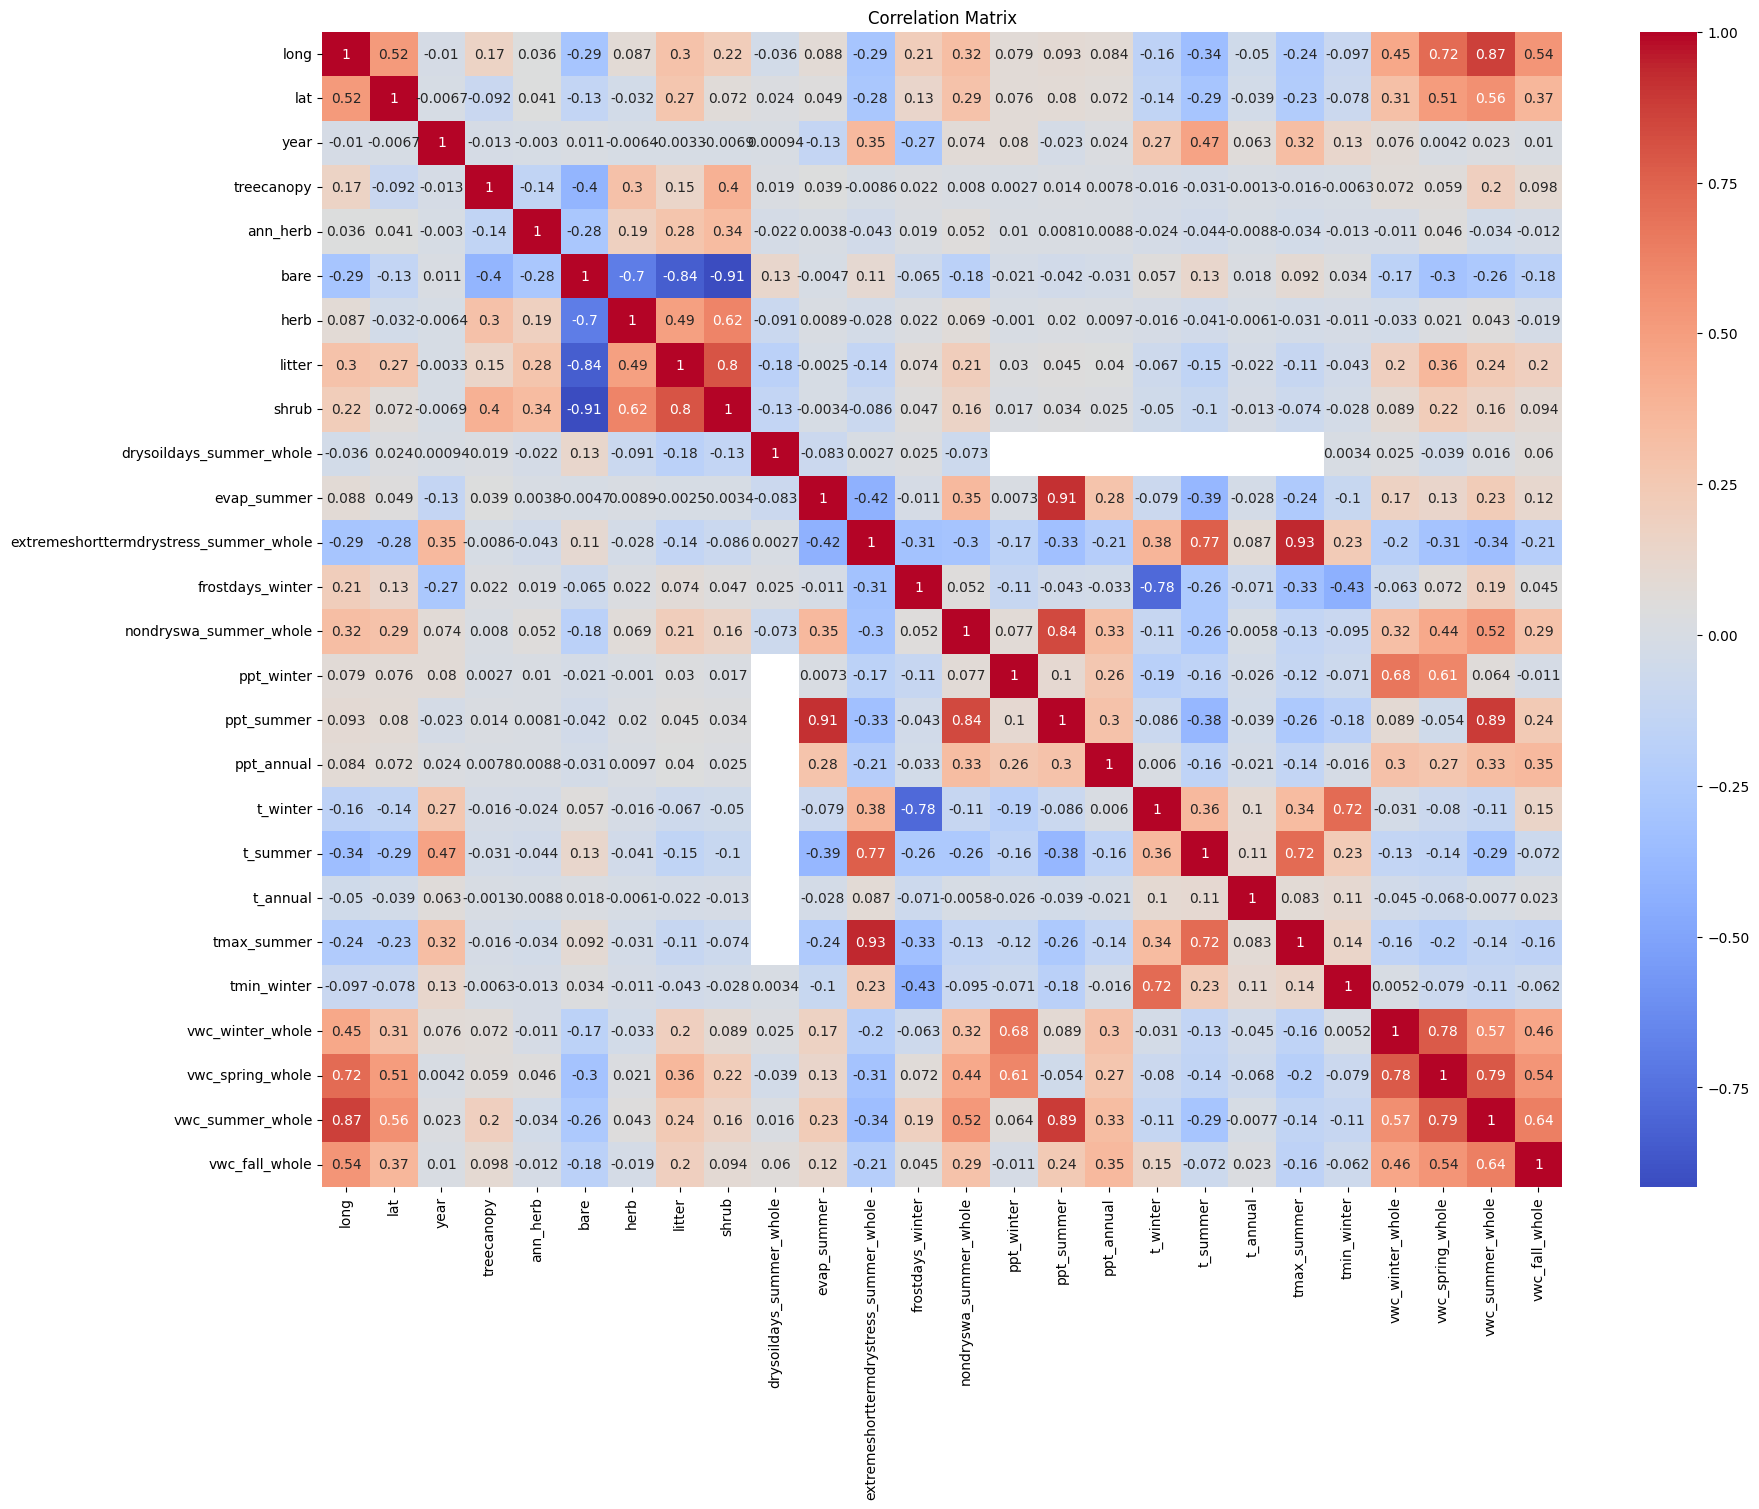

In [25]:
# plot a correlation matrix of the numerical columns
plt.figure(figsize=(20, 15))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [28]:
# filter out where the rcp column is 8.5
rcp_8_5 = df[df['rcp'] == 8.5]
rcp_8_5

,long,lat,year,timeperiod,rcp,scenario,treecanopy,ann_herb,bare,herb,...,ppt_annual,t_winter,t_summer,t_annual,tmax_summer,tmin_winter,vwc_winter_whole,vwc_spring_whole,vwc_summer_whole,vwc_fall_whole
57,-110.0472,37.60413,2021,NT,8.5,sc42,0,0,84,5,...,NaN,0.849111,23.93522,NaN,37.29,NaN,NaN,NaN,NaN,NaN
58,-110.0472,37.60413,2021,NT,8.5,sc42,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-16.48,0.124435,0.087669,0.041831,0.063907
59,-110.0472,37.60413,2021,NT,8.5,sc43,0,0,84,5,...,NaN,0.107278,23.80016,NaN,38.23,NaN,NaN,NaN,NaN,NaN
60,-110.0472,37.60413,2021,NT,8.5,sc43,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-17.99,0.117532,0.090345,0.041144,0.063768
61,-110.0472,37.60413,2021,NT,8.5,sc44,0,0,84,5,...,11.45,3.519500,24.55060,24.5506,38.29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55797,-109.9659,37.62525,2024,NT,8.5,sc57,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-12.16,0.142255,0.173792,0.091433,0.106907
55798,-109.9659,37.62525,2024,NT,8.5,sc58,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-12.16,0.166254,0.158146,0.086355,0.095905
55799,-109.9659,37.62525,2024,NT,8.5,sc59,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-10.38,0.151342,0.175814,0.091992,0.109333
55800,-109.9659,37.62525,2024,NT,8.5,sc60,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-10.61,0.122249,0.104884,0.087115,0.118908


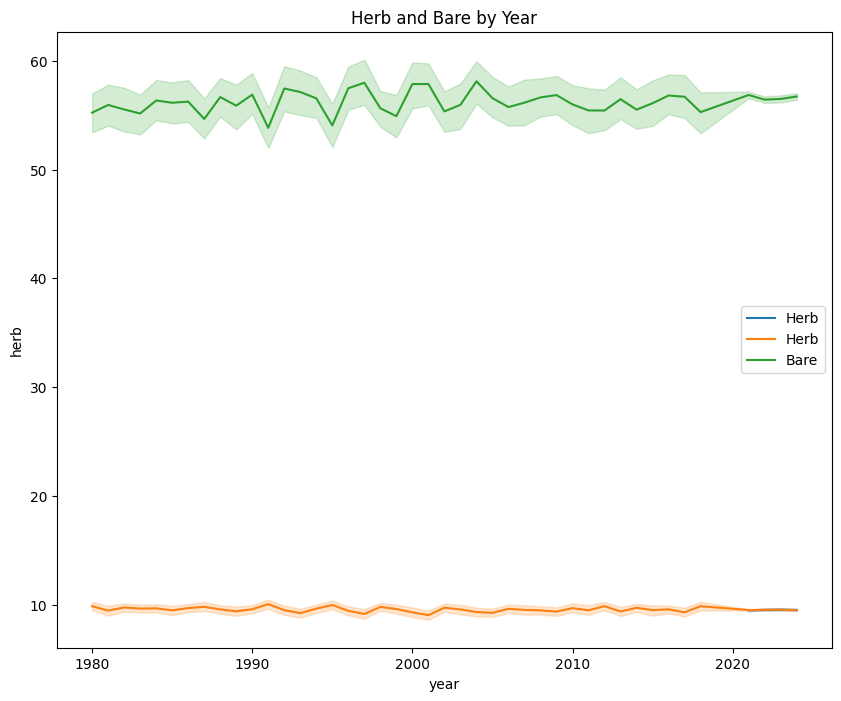

In [32]:
# plot a line graph of herb and bare rcp by year
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x='year', y='herb', label='Herb')
sns.lineplot(data=df, x='year', y='bare', label='Bare')
plt.title('Herb and Bare by Year')
plt.show()